In [1]:
import snap

In [2]:
g = snap.TUNGraph.New()

In [3]:
seen = set()
with open("network.csv", "rt") as fd:
    for line in fd:
        src, tgt = line.split(",")
        src = int(src)
        tgt = int(tgt)
        
        if src not in seen:
            g.AddNode(src)
            seen.add(src)
            
        if tgt not in seen:
            g.AddNode(tgt)
            seen.add(tgt)
            
        g.AddEdge(src, tgt)

In [4]:
rg = snap.GenRndGnm(snap.TUNGraph, g.GetNodes(), g.GetEdges())

In [5]:
ppi_distrib = [(p.GetVal1(), p.GetVal2()) for p in g.GetDegCnt()]

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
xs = [p[0] for p in ppi_distrib]
ys = [p[1] for p in ppi_distrib]

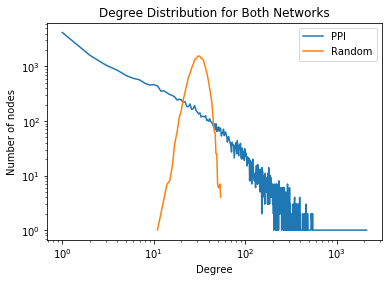

In [9]:
rnd_distrib = [(p.GetVal1(), p.GetVal2()) for p in rg.GetDegCnt()]
rxs = [p[0] for p in rnd_distrib]
rys = [p[1] for p in rnd_distrib]

fig, ax = plt.subplots()
ax.loglog(xs, ys, label = "PPI")
ax.loglog(rxs, rys, label = "Random")
ax.set_xlabel("Degree")
ax.set_ylabel("Number of nodes")
ax.set_title("Degree Distribution for Both Networks")

ax.legend()
plt.show()